In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
df = df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]
df.rename(columns={
    'housing_median_age': 'house_age',
    'median_income': 'income',
    'median_house_value': 'value'
}, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   house_age       20640 non-null  float64
 1   total_rooms     20640 non-null  float64
 2   total_bedrooms  20433 non-null  float64
 3   population      20640 non-null  float64
 4   households      20640 non-null  float64
 5   income          20640 non-null  float64
 6   value           20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [24]:
df.describe()

,house_age,total_rooms,total_bedrooms,population,households,income,value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
df.isnull().sum()

house_age           0
total_rooms         0
total_bedrooms    207
population          0
households          0
income              0
value               0
dtype: int64

In [26]:
df.isna().sum()

house_age           0
total_rooms         0
total_bedrooms    207
population          0
households          0
income              0
value               0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df['total_bedrooms'].replace(np.nan, df['total_bedrooms'].mean(), inplace=True)

df.isna().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3820\1438502871.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].replace(np.nan, df['total_bedrooms'].mean(), inplace=True)


house_age         0
total_rooms       0
total_bedrooms    0
population        0
households        0
income            0
value             0
dtype: int64

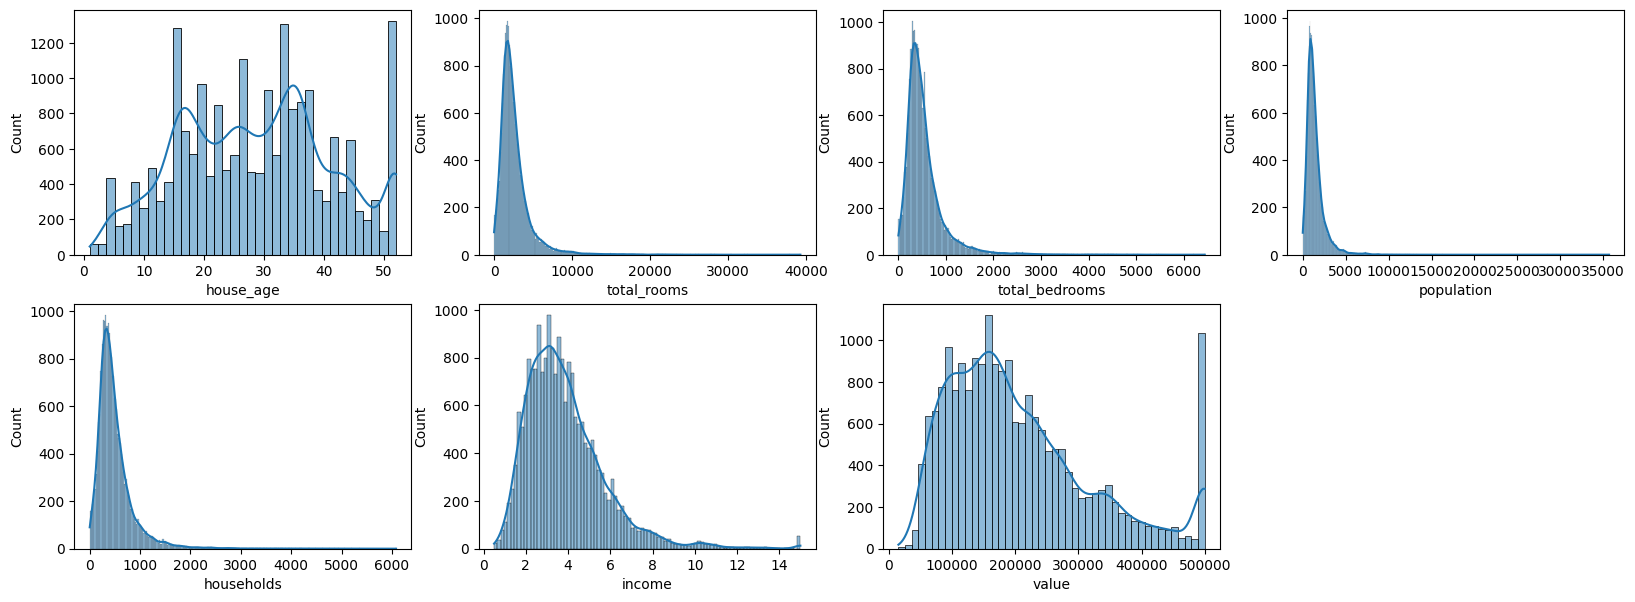

In [33]:
fig = plt.figure(figsize=(20,7))
for i in range(len(df.columns)):
    col = df.columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.histplot(data=df, x=col, kde=True)


<Axes: >

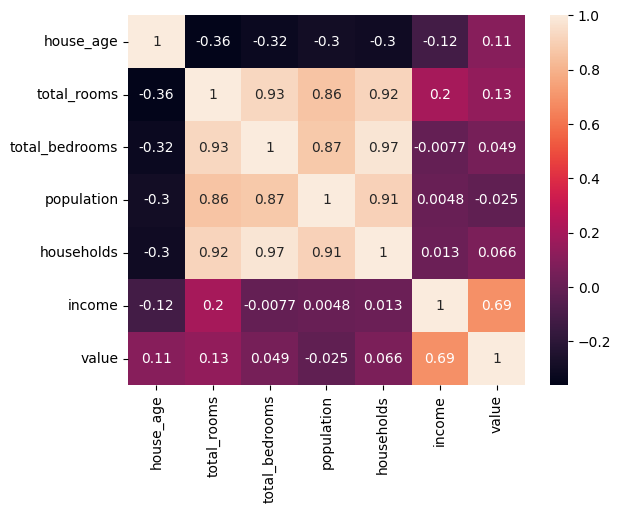

In [34]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [36]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.index

Index([14196,  8267, 17445, 14265,  2271, 17848,  6252,  9389,  6113,  6061,
       ...
       11363, 14423,  4426, 16850,  6265, 11284, 11964,  5390,   860, 15795],
      dtype='int64', length=16512)

In [38]:
X_test.index

Index([20046,  3024, 15663, 20484,  9814, 13311,  7113,  7668, 18246,  5723,
       ...
        4653,  1783,  7608,     0, 10155, 15362, 16623, 18086,  2144,  3665],
      dtype='int64', length=4128)

In [39]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [40]:
print(linear.intercept_)

-47897.58543802853


In [41]:
print(linear.coef_)

[ 1.89699824e+03 -2.00028194e+01  1.01942122e+02 -3.56517934e+01
  1.27029956e+02  4.79589084e+04]


In [42]:
y_pred = linear.predict(X_test)

In [44]:
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_absolute_error: {mean_absolute_error(y_test, y_pred)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'root_mean_squared_error: {root_mean_squared_error(y_test, y_pred)}')

r2_score: 0.5448767095949154
mean_absolute_error: 56739.98501933227
mean_absolute_percentage_error: 0.3503647099213878
root_mean_squared_error: 77226.78589410303


In [45]:
residuals = y_test - y_pred

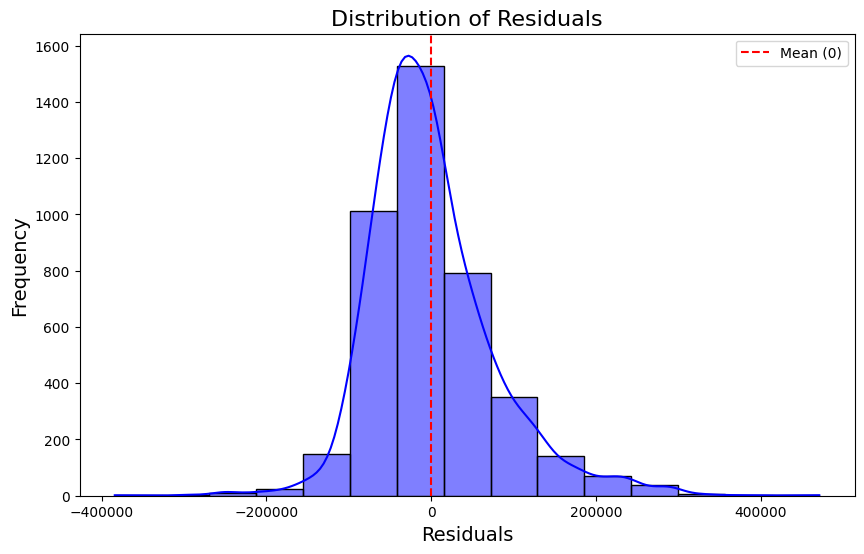

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue", bins=15)
plt.title("Distribution of Residuals", fontsize=16)
plt.xlabel("Residuals", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(0, color="red", linestyle="--", linewidth=1.5, label="Mean (0)")
plt.legend()
plt.show()